### Support Vector Machines, 14/3-2024

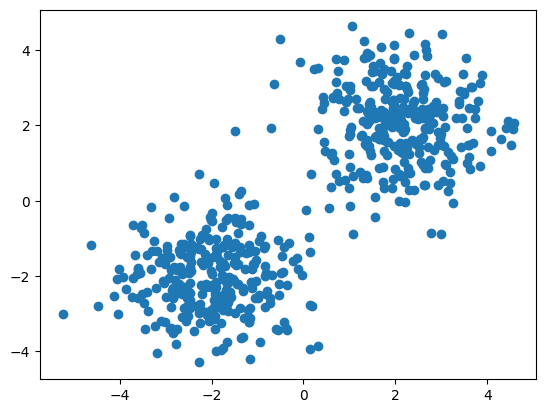

In [13]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
blobs = make_blobs([300, 300], 2, centers=[(-2,-2),(2,2)], random_state=42)[0]

plt.scatter(blobs[:,0], blobs[:,1])

<Axes: xlabel='X1', ylabel='X2'>

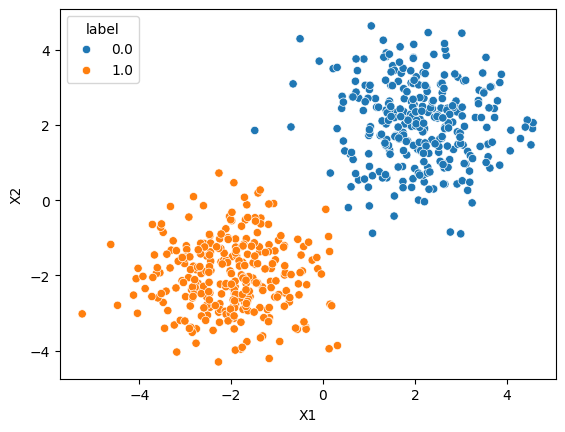

In [14]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
kmeans = KMeans(2)
kmeans.fit(blobs)
blobs = np.c_[blobs, kmeans.predict(blobs)]

df = pd.DataFrame(blobs, columns=['X1','X2','label'])
sns.scatterplot(data = df, x = 'X1', y='X2', hue='label')

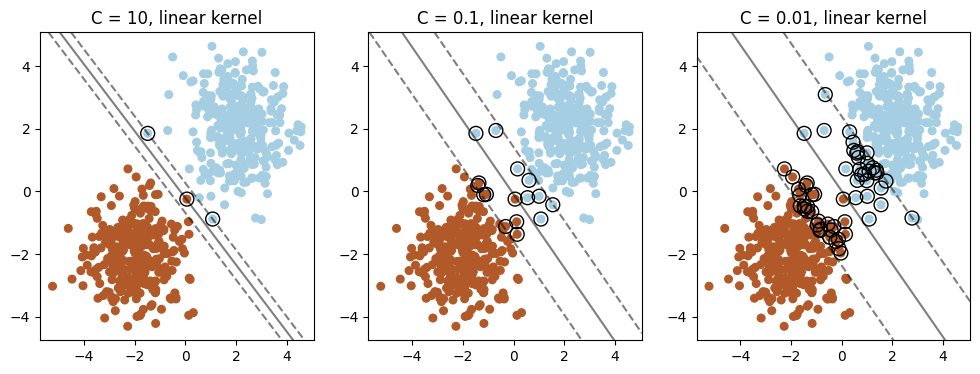

In [15]:
from utils import plot_svm_margins
from sklearn.svm import LinearSVC, SVC
X, y = df.drop('label', axis="columns").to_numpy(), df['label'].to_numpy()
fig, ax = plt.subplots(1,3, dpi=100, figsize=(12,4))

for i, C in enumerate ([10, 0.1, 0.01], 1):
    plt.subplot(1,3, i)
    plot_svm_margins(SVC(kernel='linear',C=C), X, y)
    ax[i-1].set(title=f'C = {C}, linear kernel')

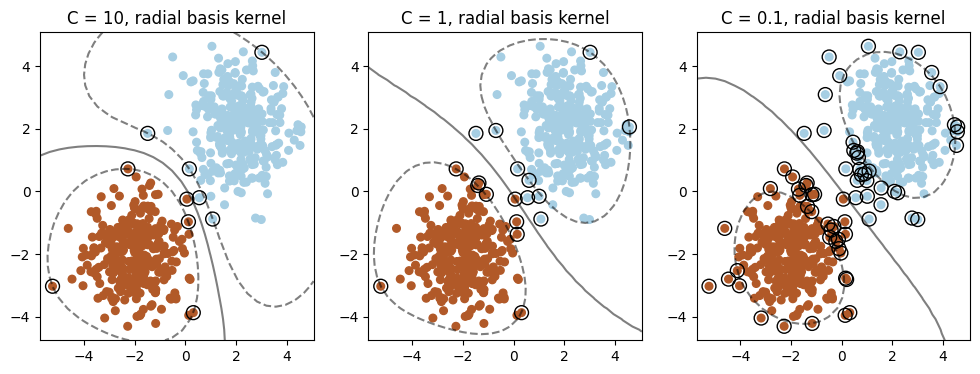

In [16]:
X, y = df.drop('label', axis="columns").to_numpy(), df['label'].to_numpy()
fig, ax = plt.subplots(1,3, dpi=100, figsize=(12,4))

for i, C in enumerate ([10, 1, 0.1], 1):
    plt.subplot(1,3,i)
    plot_svm_margins(SVC(kernel='rbf',C=C), X, y)
    ax[i-1].set(title=f'C = {C}, radial basis kernel')

Den till vänster mer bias lägre varians.

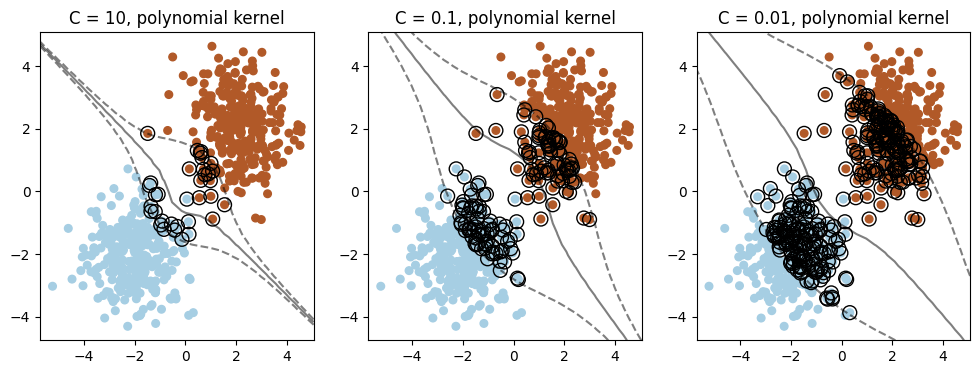

In [11]:
X, y = df.drop('label', axis="columns").to_numpy(), df['label'].to_numpy()
fig, ax = plt.subplots(1,3, dpi=100, figsize=(12,4))

for i, C in enumerate ([10, 0.1, 0.01], 1):
    plt.subplot(1,3, i)
    plot_svm_margins(SVC(kernel='poly',C=C), X, y)
    ax[i-1].set(title=f'C = {C}, polynomial kernel')

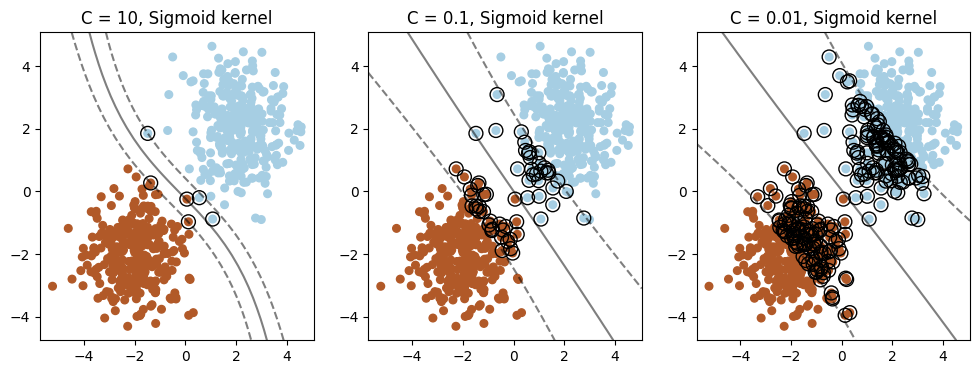

In [17]:
X, y = df.drop('label', axis="columns").to_numpy(), df['label'].to_numpy()
fig, ax = plt.subplots(1,3, dpi=100, figsize=(12,4))

for i, C in enumerate ([10, 0.1, 0.01], 1):
    plt.subplot(1,3, i)
    plot_svm_margins(SVC(kernel='sigmoid',C=C), X, y)
    ax[i-1].set(title=f'C = {C}, Sigmoid kernel')